<a href="https://colab.research.google.com/github/Manas2001Agarwal/DATA_SCIENCE_PROJECTS_PORTFOLIO/blob/main/Logistic_Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv("/content/diabetes.csv")

**HERE WE ARE USING THE PIMA DIABETES DATASET**

**The dataset is taken from KAGGLE**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Some Exploratory Data Analysis. Trying to Understand Data through tables,
bar graphs, box plots and probablity density curves

In [ ]:
dataset['Glucose']=np.where(dataset['Glucose']==0,dataset['Glucose'].median(),dataset['Glucose'])
dataset['Insulin']=np.where(dataset['Insulin']==0,dataset['Insulin'].median(),dataset['Insulin'])
dataset['SkinThickness']=np.where(dataset['SkinThickness']==0,dataset['SkinThickness'].median(),dataset['SkinThickness'])

In [ ]:
dataset.groupby('Outcome').agg(['count','mean','std','median','min','max'])['Insulin']

,count,mean,std,median,min,max
Outcome,,,,,,
0,500,83.188000,89.565700,39.0,15.0,744.0
1,268,116.041045,127.689084,30.5,14.0,846.0


In [ ]:
dataset.groupby('Outcome').agg(['count','mean','std','median','min','max'])['Glucose']

,count,mean,std,median,min,max
Outcome,,,,,,
0,500,110.682000,24.707201,107.5,44.0,197.0
1,268,142.130597,29.568839,140.0,78.0,199.0


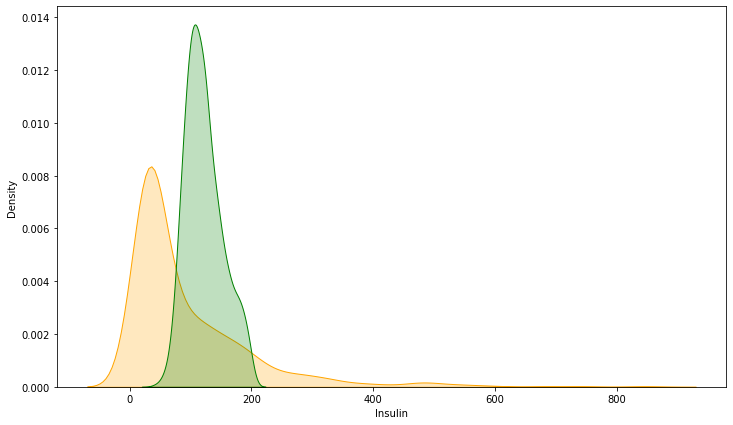

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(x='Insulin',data = dataset,shade = True,color ='orange')
sns.kdeplot(x='Glucose',data = dataset,shade = True,color = 'green')

In [ ]:
table = pd.crosstab(dataset['Outcome'], dataset['Pregnancies'])
table

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


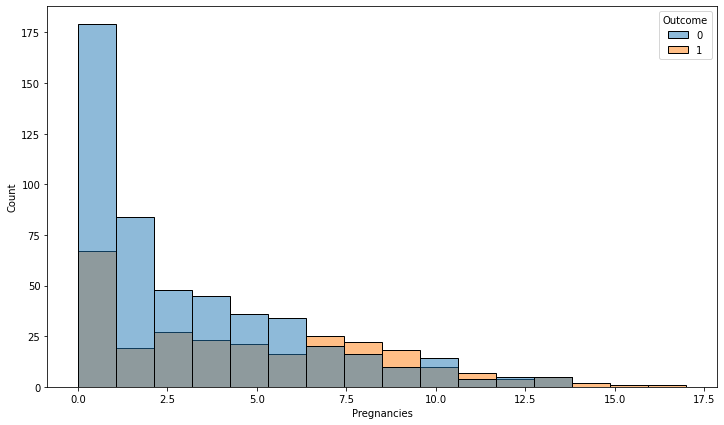

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(x='Pregnancies',data = dataset,hue = 'Outcome')

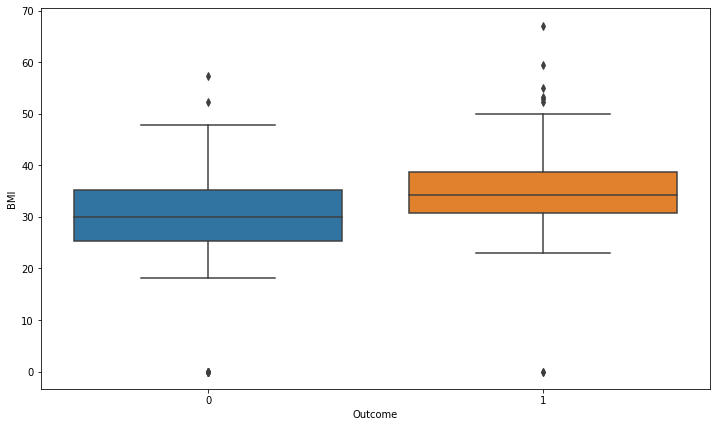

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Outcome',y='BMI',data = dataset)

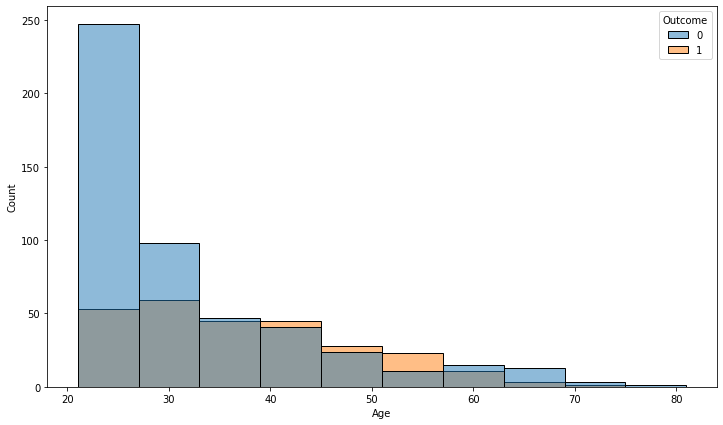

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(x = 'Age',hue = 'Outcome', data = dataset,bins = 10)

Feature Selection using pairplot and Pearsons Correlation matrix

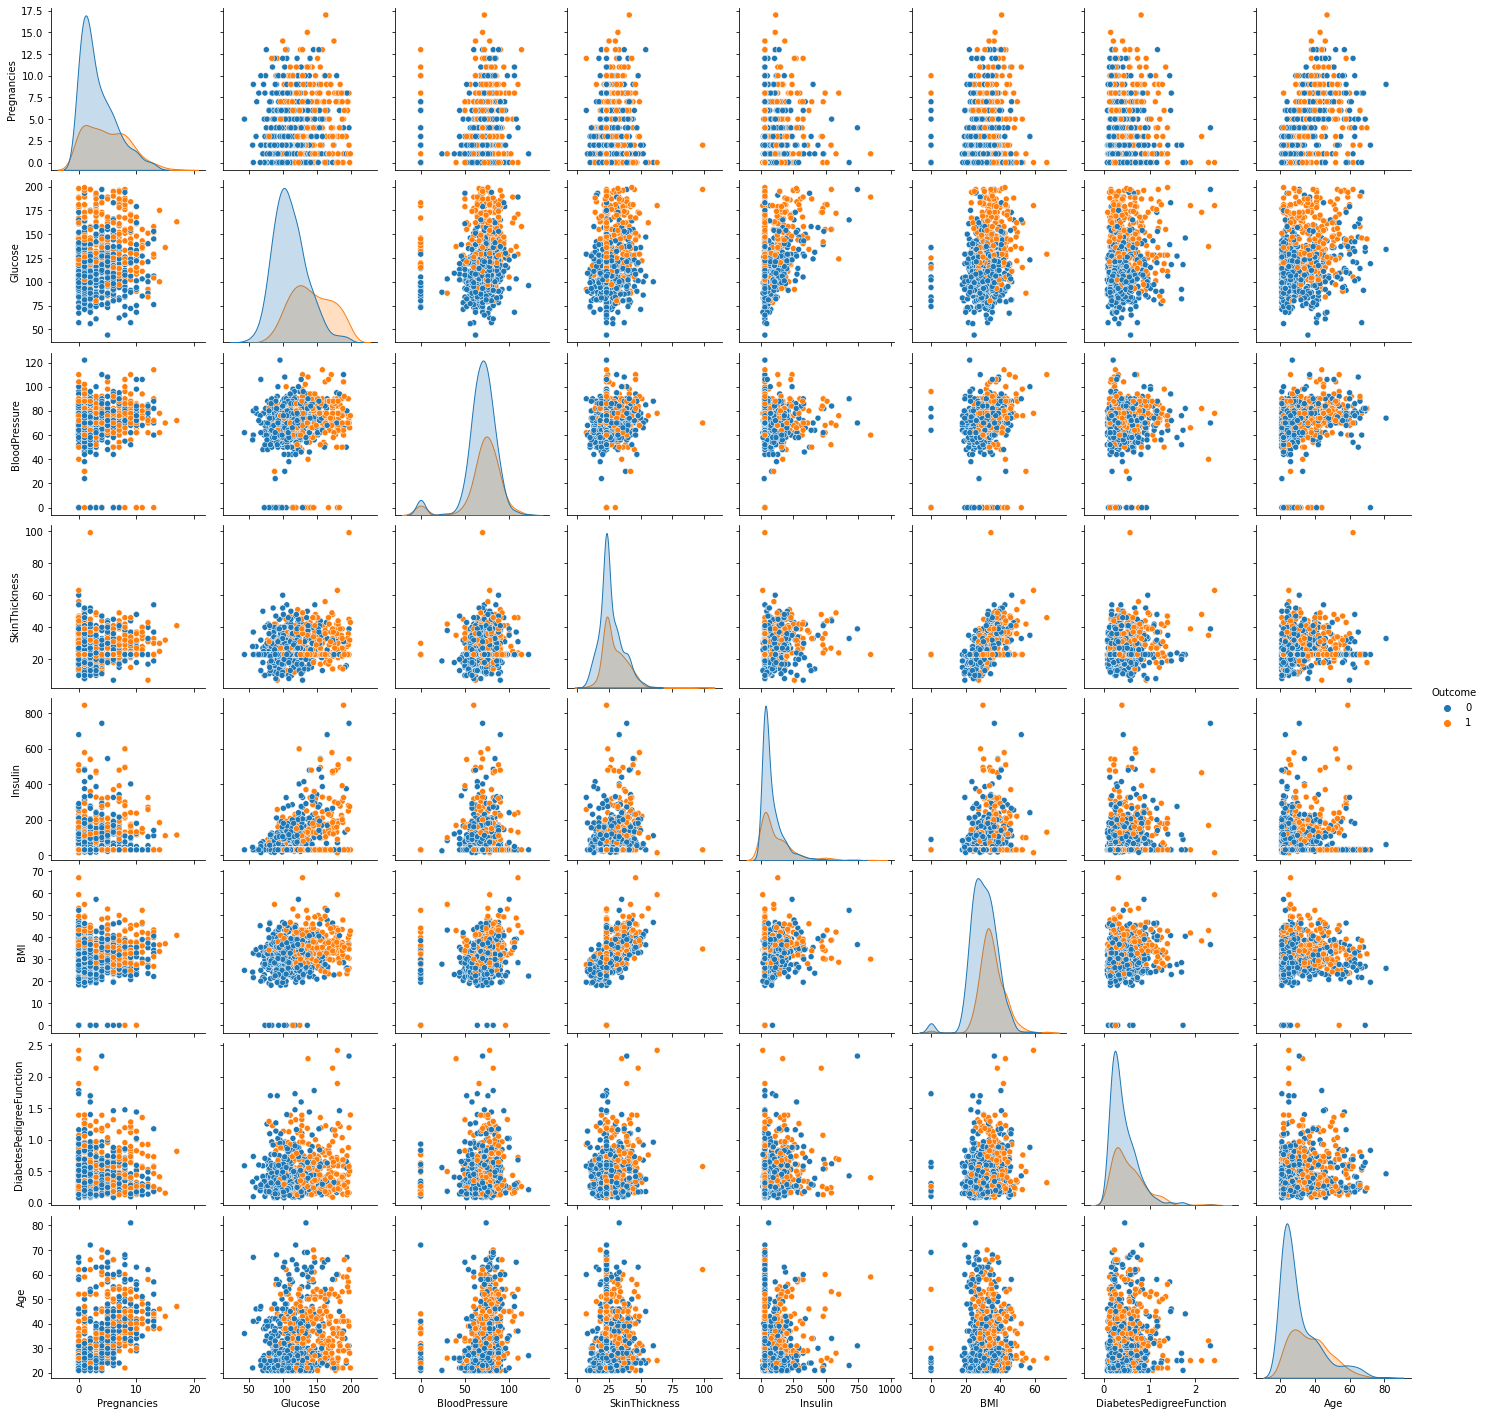

In [ ]:
sns.pairplot(dataset,hue='Outcome')

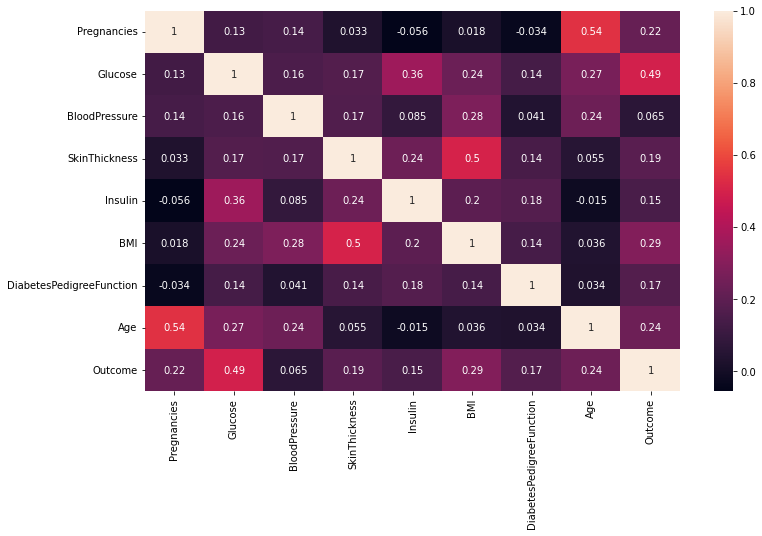

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(dataset.corr(),annot = True)

In [ ]:
X = dataset.drop('Outcome',axis=1)
y = dataset.iloc[:,-1]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35.0,30.5,33.6,0.627,50
1,1,85.0,66,29.0,30.5,26.6,0.351,31
2,8,183.0,64,23.0,30.5,23.3,0.672,32
3,1,89.0,66,23.0,94.0,28.1,0.167,21
4,0,137.0,40,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63
764,2,122.0,70,27.0,30.5,36.8,0.340,27
765,5,121.0,72,23.0,112.0,26.2,0.245,30
766,1,126.0,60,23.0,30.5,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter = 150)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, roc_curve, auc, log_loss, recall_score, ConfusionMatrixDisplay 
print("accuracy")
print(accuracy_score(y_test,y_pred))

print(" ")
print("classification report")
print(classification_report(y_test,y_pred))
print(" ")
cm = confusion_matrix(y_test,y_pred,normalize = 'true')
print(cm)

accuracy
0.7401574803149606
 
classification report
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       168
           1       0.62      0.60      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254

 
[[0.80952381 0.19047619]
 [0.39534884 0.60465116]]


Displaying Confusion Matrix Using Built in Confusion Matrix Display Function

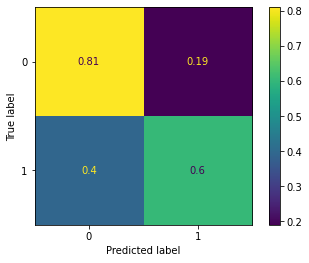

<Figure size 864x504 with 0 Axes>

In [ ]:
dsp = ConfusionMatrixDisplay(cm)
dsp.plot()
plt.figure(figsize=(12,7))
plt.show()

Displaying Confusion Matrix using Seaborn Library

Text(87.0, 0.5, 'Actual_label')

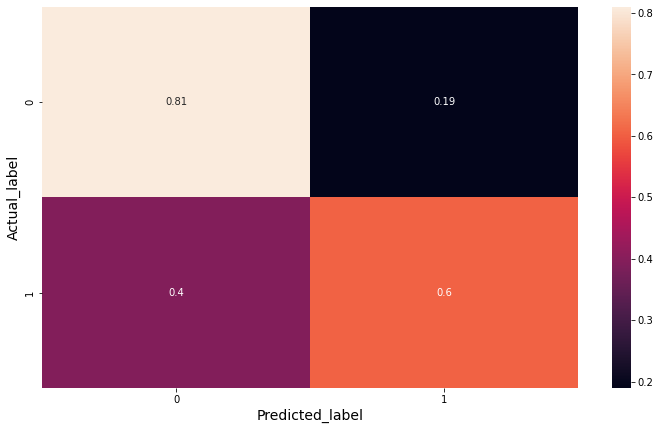

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted_label",fontsize = 14)
plt.ylabel("Actual_label",fontsize = 14)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [ ]:
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.740
LogisticRegression log_loss is 0.520
LogisticRegression auc is 0.800


In [ ]:
tpr

array([0.        , 0.01162791, 0.01162791, 0.04651163, 0.04651163,
       0.06976744, 0.06976744, 0.1744186 , 0.1744186 , 0.19767442,
       0.19767442, 0.26744186, 0.26744186, 0.27906977, 0.27906977,
       0.29069767, 0.29069767, 0.31395349, 0.31395349, 0.39534884,
       0.39534884, 0.47674419, 0.47674419, 0.48837209, 0.48837209,
       0.52325581, 0.52325581, 0.53488372, 0.53488372, 0.54651163,
       0.54651163, 0.56976744, 0.56976744, 0.60465116, 0.60465116,
       0.62790698, 0.62790698, 0.63953488, 0.63953488, 0.65116279,
       0.65116279, 0.6627907 , 0.6627907 , 0.68604651, 0.68604651,
       0.69767442, 0.69767442, 0.70930233, 0.70930233, 0.72093023,
       0.72093023, 0.73255814, 0.73255814, 0.74418605, 0.74418605,
       0.75581395, 0.75581395, 0.77906977, 0.77906977, 0.81395349,
       0.81395349, 0.8255814 , 0.8255814 , 0.8372093 , 0.8372093 ,
       0.84883721, 0.84883721, 0.86046512, 0.86046512, 0.87209302,
       0.87209302, 0.88372093, 0.88372093, 0.89534884, 0.89534

In [ ]:
idx = np.min(np.where(tpr > 0.95))

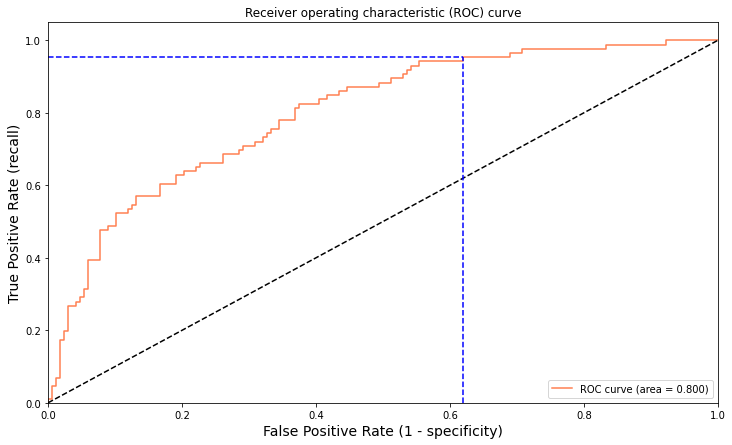

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

NOW WE WILL DO CROSS_VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, StratifiedShuffleSplit

In [ ]:
cv = StratifiedKFold(n_splits=5,random_state = 55,shuffle = True)
model_cv = cross_validate(model,X_train,y_train,cv=cv,scoring = ['accuracy','f1','roc_auc','jaccard'],verbose = 2,return_train_score = True)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [ ]:
for x in model_cv.keys():
  model_cv[x] = model_cv[x].mean()

In [ ]:
for x in model_cv.keys():
  print(x, " : ", model_cv[x])

fit_time  :  0.0035578727722167967
score_time  :  0.004372835159301758
test_accuracy  :  0.7723396154578336
train_accuracy  :  0.7859896534618384
test_f1  :  0.6392994818801271
train_f1  :  0.6640930228848102
test_roc_auc  :  0.8465438980364354
train_roc_auc  :  0.8596307412321857
test_jaccard  :  0.47121606064983207
train_jaccard  :  0.49728726962171976


This curve shows the ROC response of different datasets, created from Stratified K-fold cross-validation. Taking all of these curves, it is possible to calculate the mean area under curve, and see the variance of the curve when the training set is split into different subsets. This roughly shows how the classifier output is affected by changes in the training data, and how different the splits generated by K-fold cross-validation are from one another.

<Figure size 864x504 with 0 Axes>

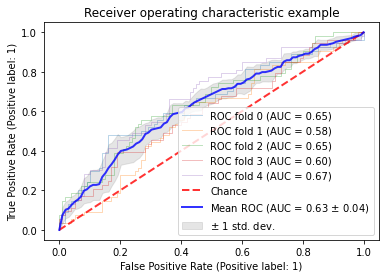

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

n_samples, n_features = X.shape

random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Run classifier with cross-validation and plot ROC curves
#cv = StratifiedKFold(n_splits=6)
#classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
fig.figsize = (12,7)
for i, (train, test) in enumerate(cv.split(X, y)):
    model.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        model,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

Learning Curve : - A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. 

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
          model,  
          X_train,  
          y_train, 
          train_sizes=[int(X_train.shape[0]*0.15),int(X_train.shape[0]*0.25), int(X_train.shape[0]*0.50), int(X_train.shape[0]*0.75), int(X_train.shape[0]*0.80)], 
          cv=5,
          scoring = 'accuracy' )

In [ ]:
print(train_sizes)
print(" ")
print(train_scores)
print(" ")
print(valid_scores)

[ 77 128 257 385 411]
 
[[0.77922078 0.8961039  0.8961039  0.8961039  0.8961039 ]
 [0.7265625  0.828125   0.8515625  0.8515625  0.8515625 ]
 [0.77431907 0.79377432 0.78988327 0.78210117 0.78210117]
 [0.76103896 0.78441558 0.77922078 0.78441558 0.77922078]
 [0.76155718 0.77858881 0.78345499 0.78345499 0.78832117]]
 
[[0.78640777 0.72815534 0.75728155 0.7184466  0.74509804]
 [0.83495146 0.68932039 0.76699029 0.72815534 0.69607843]
 [0.84466019 0.72815534 0.80582524 0.74757282 0.74509804]
 [0.84466019 0.72815534 0.81553398 0.73786408 0.74509804]
 [0.84466019 0.73786408 0.81553398 0.72815534 0.76470588]]


Text(0.5, 1.0, 'Learning_Curve')

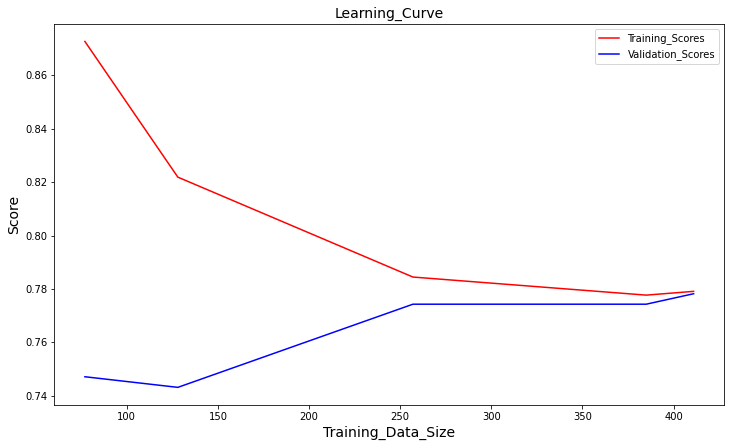

In [ ]:
train_scores = train_scores.mean(axis=1)
valid_scores = valid_scores.mean(axis=1)
plt.figure(figsize=(12,7))
sns.lineplot(x = train_sizes,y = train_scores,label = 'Training_Scores',color = 'red')

sns.lineplot(x = train_sizes,y = valid_scores,label = 'Validation_Scores',color = 'blue')

plt.xlabel('Training_Data_Size',fontsize=14)
plt.ylabel('Score',fontsize=14)

plt.title("Learning_Curve",fontsize = 14)

HyperParameter_Tuning_by_GRID_SEARCH_CV

In [ ]:
parameter = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'C' : [0.01,0.1,0.5,1.0,2.5,3.25,4.0,10,100],
             'fit_intercept' : (True,False),
             'max_iter' : [100,150,200,250,300],
             'intercept_scaling' : [0.1, 1, 1.5, 2, 2.5, 3, 4, 10 ]
             }

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator = model, param_grid = parameter, scoring = 'accuracy', cv = 3, verbose = 1)

clf.fit(X_train,y_train)

Fitting 3 folds for each of 14400 candidates, totalling 43200 fits


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=150),
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 2.5, 3.25, 4.0, 10, 100],
                         'fit_intercept': (True, False),
                         'intercept_scaling': [0.1, 1, 1.5, 2, 2.5, 3, 4, 10],
                         'max_iter': [100, 150, 200, 250, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
print(clf.best_estimator_)

LogisticRegression(C=0.1, intercept_scaling=2, penalty='l1', solver='liblinear')


In [ ]:
clf.best_score_

0.7820844099913867

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("accuracy")
print(accuracy_score(y_test,clf.predict(X_test)))

print(" ")
print("classification report")
print(classification_report(y_test,clf.predict(X_test)))
print(" ")
print(confusion_matrix(y_test,clf.predict(X_test)))

accuracy
0.7362204724409449
 
classification report
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       168
           1       0.62      0.56      0.59        86

    accuracy                           0.74       254
   macro avg       0.70      0.69      0.70       254
weighted avg       0.73      0.74      0.73       254

 
[[139  29]
 [ 38  48]]


Text(87.0, 0.5, 'Actual_label')

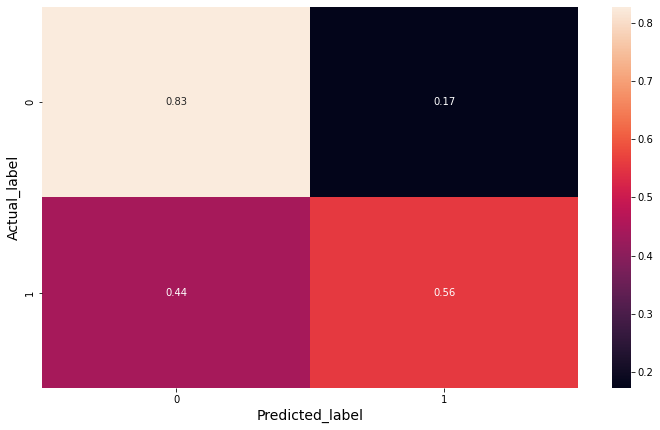

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test,clf.predict(X_test),normalize = 'true'),annot = True)
plt.xlabel("Predicted_label",fontsize = 14)
plt.ylabel("Actual_label",fontsize = 14)

**Here we see that after performing GRID_SEARCH_CV we were able to increase accuracy from 74% to 78%. Also the number of True Positive and True Negative have increased ,and on the contrary False positives and False negatives have decreased**





MODEL DEPLOYEMENT

In [ ]:
import pickle

In [ ]:
model = LogisticRegression(C=0.1, intercept_scaling=2, penalty='l1', solver='liblinear')
model.fit(X_train,y_train)
pickle.dump(model, open('model.pkl','wb'))



**THIS MARKS THE ENDING OF THIS PRACTICE PROJECT**